# "Исследование рынка заведений общественного питания в г. Москве" <a class="tocSkip">

## Цель исследования

<div style="border: ridge black 3px; padding: 25px">
    
<b>Целью данного исследования является выявление особенностей заведений общественного питания в г.Москве и дача рекомендаций для принятия решения об открытии заведения с роботами-официантами.</b><br><br>
    
Исследование будет проходить на основании предоставленных открытых данных о заведениях общественного питания в г. Москве.<br><br>

Мы изучим датафрейм, произведем предобработку исходного датафрейма, проведем анализ, в конце исследования сформулируем общий вывод, дадим рекомендации и прикрепим ссылку на презентацию в формате `.pdf`.<br>

</div>

## Описание исходных данных

**Ниже представлено описание доступной нам информации по датафрейму**.

Путь к файлу: `/datasets/rest_data.csv`

Датафрейм **rest_data** содержит:
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

## Открытие данных

In [1]:
# импортируем основные нужные библиотеки 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# читаем файл и присваиваем ему одноименное название

rest_data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
# дополним названия некоторых столбцов датафрейма для удобства и наглядности в понимании

rest_data = rest_data.rename({'number': 'seats_numbers', 'address': 'object_address'}, axis = 'columns')
rest_data.name = '"Открытые данные о заведениях общественного питания г.Москвы"'

# и выведем на экран общую информацию, содержимое и наличие/отсутствие пропусков в датафрейме

print(rest_data.info())
print('--------------------------------------------------------------------------------------------------------------------')
print(rest_data.name)
display(rest_data.head(10))
print('--------------------------------------------------------------------------------------------------------------------')
print('Кол-во пропусков')
display(pd.DataFrame((rest_data.isna().mean()*100).round(2)).style.background_gradient('coolwarm'))    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id                15366 non-null int64
object_name       15366 non-null object
chain             15366 non-null object
object_type       15366 non-null object
object_address    15366 non-null object
seats_numbers     15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None
--------------------------------------------------------------------------------------------------------------------
"Открытые данные о заведениях общественного питания г.Москвы"


,id,object_name,chain,object_type,object_address,seats_numbers
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


--------------------------------------------------------------------------------------------------------------------
Кол-во пропусков


,0
id,0
object_name,0
chain,0
object_type,0
object_address,0
seats_numbers,0


Как мы видим, что пропусков нет и типы данных верны. Но стоит привести к нижнему регистру содержание столбца `object_name` для последующей корректной проверки на дубли. Просмотрим еще уникальные значения столбцов `chain` и `object_type`.

In [4]:
# применим данный метод для последующего отображения всего содержимого строк, в частности столбца `object_address`
pd.options.display.max_colwidth = 200 

display(rest_data['object_type'].unique())
display(rest_data['chain'].unique())

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

array(['нет', 'да'], dtype=object)

Типы объектов общественного питания соответствуют классификации предприятий общественного питания (ГОСТ Р 50762-2007 «Классификация предприятий», п.4), поэтому производить какую-либо замену категорий не будем. А значия "нет" и "да" в столбце `chain` логично будет заметить для удобства в дальнейшем на "сетевой" и "не сетевой".

### Вывод

<div style="border:solid black 2px; padding: 20px">
    
При открытии данных мы скорректировали некоторые названия столбцов, пропусков не обнаружили, определили необходимость приведения к нижнему регистру столбца `object_name` и необходимость замены значений в столбце `chain`.<br><br>

Приступим к предобработке.
    
</div>

## Предобработка данных

### Обработка дубликатов

In [5]:
# приводим к нижнему регистру

rest_data['object_name'] = rest_data['object_name'].str.lower()

# проверяем датафрейм на наличие грубых дубликатов

duplicates = rest_data.duplicated().sum()
if duplicates > 0:
    print('Количество дубликатов =', duplicates)
else:
    print('Дубликатов не найдено')

Дубликатов не найдено


Дополнительно проверим наличие дубликатов за исключением столбца `id`. Возможно, есть скрытые дубликаты.

In [6]:
print(
    "Найдено дубликатов (без учета 'id' объекта):", 
    rest_data[['object_name', 'chain', 'object_type', 'object_address', 'seats_numbers']].duplicated().sum()
)

Найдено дубликатов (без учета 'id' объекта): 85


Похоже действительно по какой-то причине (вероятно по технической ошибке) произошло дублирование в данных. Просмотрим некоторые строки.

In [7]:
rest_data[rest_data[['object_name', 'chain', 'object_type', 'object_address', 'seats_numbers']].duplicated()==True] \
.sort_values(by='object_name').head(15)

,id,object_name,chain,object_type,object_address,seats_numbers
13858,209723,laltro bosco,нет,ресторан,"город Москва, улица Петровка, дом 10",145
5059,20021,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, корпус 1",20
5069,20025,lift,нет,кафе,"город Москва, Багратионовский проезд, дом 7, корпус 3",10
14844,219518,sushi-make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
5762,134324,алекс,нет,кафе,"город Москва, Тихорецкий бульвар, владение 1, строение 2",45
6423,19759,бар,нет,бар,"город Москва, улица Улофа Пальме, дом 5, строение 1",10
14350,214747,бистро,нет,предприятие быстрого обслуживания,"город Москва, проспект Вернадского, дом 86Б, строение 1",1
14351,214734,бистро,нет,предприятие быстрого обслуживания,"город Москва, проспект Вернадского, дом 86Б, строение 1",1
14352,214738,бистро,нет,предприятие быстрого обслуживания,"город Москва, проспект Вернадского, дом 86Б, строение 1",1
11375,190371,буфет,нет,буфет,"город Москва, Пятницкое шоссе, дом 18",0


Обнаруженные 85 дубликатов удалим.

In [8]:
rest_data = rest_data \
.drop(rest_data[rest_data[['object_name', 'chain', 'object_type', 'object_address', 'seats_numbers']].duplicated()==True].index)

Т.к. мы не обладаем информацией из какого именно открытого источника взяты предоставленные данные, допускаем, что это взято из определенного реестра предприятий и корректность названий соответствует действительности (адреса объектов заполнены по единому шаблону и последовательности (город-улица-дом-строение/корпус), судя по этому это данные из городского реестра). Производить более детальный анализ на дубликаты в названиях объектов в этом исследовании мы не будем, это потребует дополнительных данных для сопоставления (английское название объекта латиницей и написание на русском в одном смысловом эквиваленте и звучании может принадлежать разным заведениям, а не одному) и функционала, и в целом для цели исследования не сыграет критичной роли.

In [9]:
# заменим значения в столбце `chain` с помощью функции и примененим ее к столбцу 'chain'

def chain_change(i):
    if i == 'да':
        return 'cетевой'
    elif i == 'нет':
        return 'не сетевой'
    
rest_data['chain'] = rest_data['chain'].apply(chain_change)

### Вывод

<div style="border:solid black 2px; padding: 20px">
    
Мы выполнили необходимую предобработку данных: выявили дубликаты, удали их; произвели замену названий в столбце `chain`.<br><br>
    
Можем приступить к анализу.
    
</div>

## Исследовательский анализ

### Изучение соотношения видов объектов и их принадлежности к сети

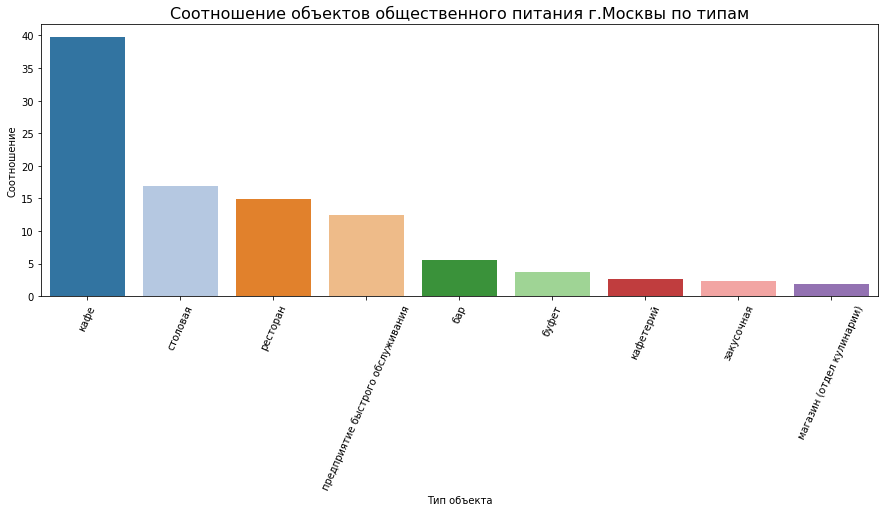

----------------------------------------------------------------------------------------------------------------


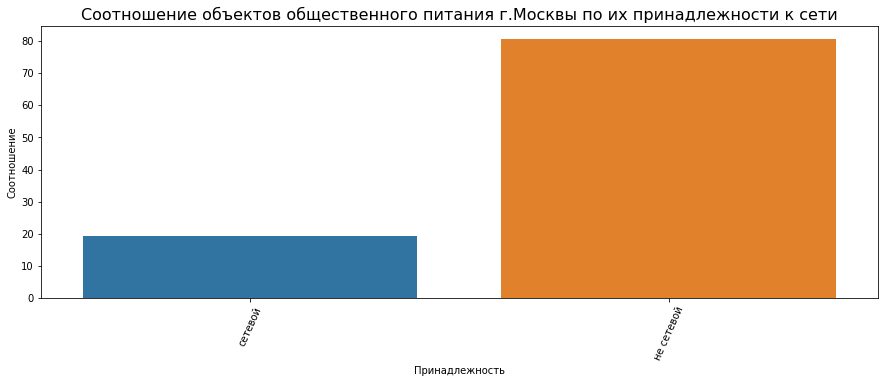

----------------------------------------------------------------------------------------------------------------


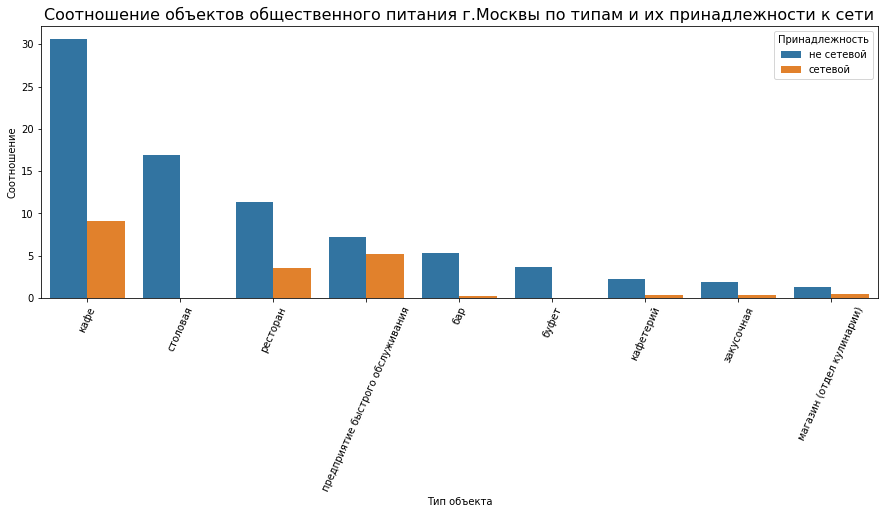

----------------------------------------------------------------------------------------------------------------
Таблица "Количество и соотношение типов объектов общественного питания г.Москвы"


,Тип объекта,Принадлежность,Количество объектов,Соотношение
0,кафе,не сетевой,4675,30.59
1,столовая,не сетевой,2581,16.89
2,ресторан,не сетевой,1739,11.38
3,кафе,cетевой,1396,9.14
4,предприятие быстрого обслуживания,не сетевой,1109,7.26
5,бар,не сетевой,818,5.35
6,предприятие быстрого обслуживания,cетевой,788,5.16
7,буфет,не сетевой,565,3.70
8,ресторан,cетевой,543,3.55
9,кафетерий,не сетевой,343,2.24


In [10]:
# сгруппируем по типу и принадлежности к сети и посчитаем количество; 
# в отдельном столбце `ratio` рассчитаем соотношение от общего кол-ва всех объектов

types_proportion = rest_data.groupby(['object_type','chain'])['id'].count().sort_values(ascending=False).reset_index()
types_proportion['ratio'] = ((types_proportion['id']/len(rest_data['object_type']))*100).round(2)
types_proportion.columns = ['Тип объекта', 'Принадлежность', 'Количество объектов', 'Соотношение']

# сгруппируем отдельно по типам и принадлежности к сети получившийся датафрейм `types_proportion`

by_types = types_proportion.groupby('Тип объекта').agg({'Соотношение': 'sum'}) \
.sort_values(by='Соотношение', ascending=False).reset_index()

by_chain = types_proportion.groupby('Принадлежность').agg({'Соотношение': 'sum'}).reset_index()

# строим гистограммы

# гистограмма соотношения типов
plt.figure(figsize=(15,5))
sns.barplot(x='Тип объекта', y='Соотношение', data=by_types, palette="tab20")
plt.title('Соотношение объектов общественного питания г.Москвы по типам', fontsize=16)
plt.tick_params(axis='x', labelrotation=66)
plt.show()
print('----------------------------------------------------------------------------------------------------------------')

# гистограмма соотношения принадлежности к сети
plt.figure(figsize=(15,5))
sns.barplot(x='Принадлежность', y='Соотношение', data=by_chain)
plt.title('Соотношение объектов общественного питания г.Москвы по их принадлежности к сети', fontsize=16)
plt.tick_params(axis='x', labelrotation=66)
plt.show()
print('----------------------------------------------------------------------------------------------------------------')

# общая гистограмма и по типам и по принадлежности
plt.figure(figsize=(15,5))
sns.barplot(x='Тип объекта', y='Соотношение', data=types_proportion, hue='Принадлежность')
plt.title('Соотношение объектов общественного питания г.Москвы по типам и их принадлежности к сети', fontsize=16)
plt.tick_params(axis='x', labelrotation=66)
plt.show()

print('----------------------------------------------------------------------------------------------------------------')
print('Таблица "Количество и соотношение типов объектов общественного питания г.Москвы"')
display(types_proportion)

<div style="border:dotted black 3px; padding: 20px">
 
- Как мы видим, больше всего в Москве заведений типа "кафе".<br>
    
- "Столовые", "рестораны" и "предприятия быстрого обслуживания" на 2, 3 и 4 месте, соответственно, по соотношению кол-ва заведений в городе.<br>
    
- 80% всех объектов яляются "не сетевыми".<br> 
    
- По общему соотношению "предприятия быстрого обслуживания" в сравнении с их "не сетевыми" объектами имеют принадлежность к сети больше остальных типов, хотя по кол-ву таких заведений находятся на 4-ом месте.<br> 
 
- "Кафе" и "рестораны" также имеют сетевые объекты, но в меньшем соотношении по сравнению с "не сетевыми" заведениями данных типов (и по сравнению с "предприятиями быстрого обслуживания").<br>
  
    
</div>

### Изучение количества посадочных мест в сетевых объектах

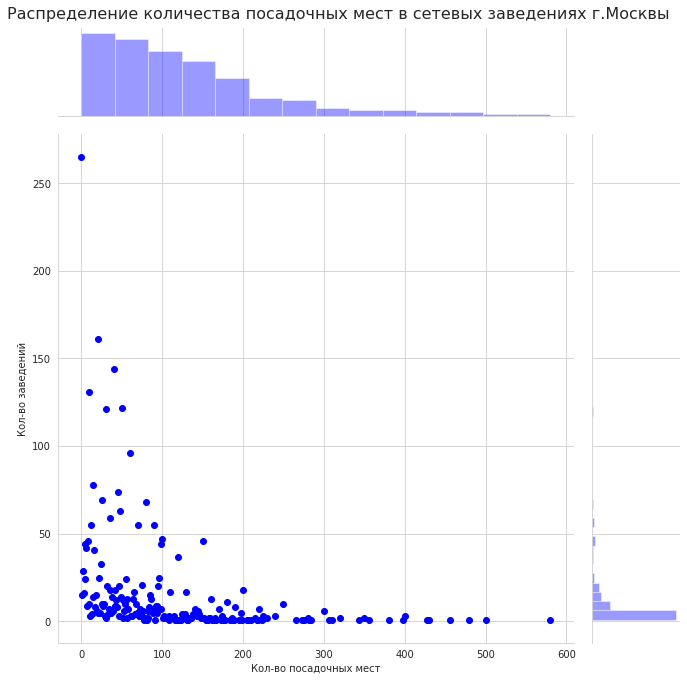

----------------------------------------------------------------------------------------------------------------
Таблица "Распределение количества посадочных мест в сетевых заведениях г.Москвы"


,Кол-во посадочных мест,Кол-во заведений
0,0,265
20,20,161
40,40,144
10,10,131
50,50,122
30,30,121
59,60,96
15,15,78
45,45,74
25,25,69


In [11]:
# сгруппируем только сетевые заведения по кол-ву посадочных мест и посчитаем кол-во заведений

chain_seats = rest_data.query('chain != "не сетевой"').groupby('seats_numbers').agg({'id': 'count'}).reset_index()
chain_seats.columns = ['Кол-во посадочных мест', 'Кол-во заведений']

# строим `jointplot`

sns.set_style("whitegrid")
chart1 = sns.jointplot(x='Кол-во посадочных мест', y='Кол-во заведений', data=chain_seats, color='blue')
chart1.fig.set_figwidth(10)
chart1.fig.set_figheight(10)
chart1.fig.suptitle('Распределение количества посадочных мест в сетевых заведениях г.Москвы', fontsize=16)
chart1.fig.subplots_adjust(top=0.95) 

plt.show()
print('----------------------------------------------------------------------------------------------------------------')
print('Таблица "Распределение количества посадочных мест в сетевых заведениях г.Москвы"')
display(chain_seats.sort_values(by='Кол-во заведений', ascending=False).head(10))

<div style="border:dotted black 3px; padding: 20px">
    
Как мы видим по распределению, то самая высокая точка по оси Y в кол-ве 265 заведений с нулевым количеством мест говорит о том, что преобладает много заведений вовсе без посадочных мест (работающие либо только "на вынос"/"c собой", либо с доступностью использования барной стойки заведения (возможно со стульями в количестве от 2 до 5, например). В данных нет уточнения про 0 мест, поэтому делаем именно такое предположение.<br><br>
    
В целом, больше всего сетевых заведений с количеством посадочных мест от 10 до 60.<br><br>
    
Заведений же с большим количеством мест от 100 до 500 (и >) меньше всего среди заведений общ.питания г.Москвы.
    
</div>

### Изучение среднего количества посадочных мест по видам объектов

Таблица "Cреднее количество посадочных мест в зависимости от типа объекта"


,Тип объекта,Среднее кол-во посадочных мест
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,32
4,кафе,30
5,предприятие быстрого обслуживания,6
6,кафетерий,6
7,магазин (отдел кулинарии),0
8,закусочная,0


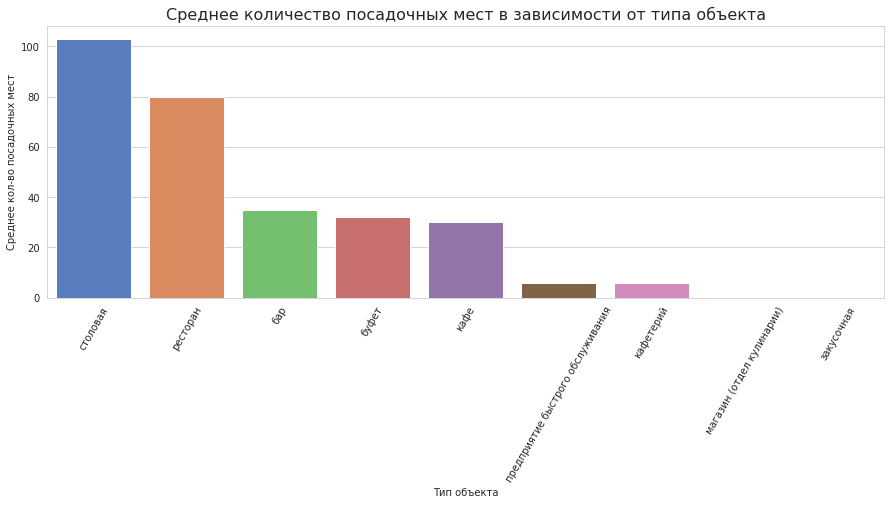

----------------------------------------------------------------------------------------------------------------


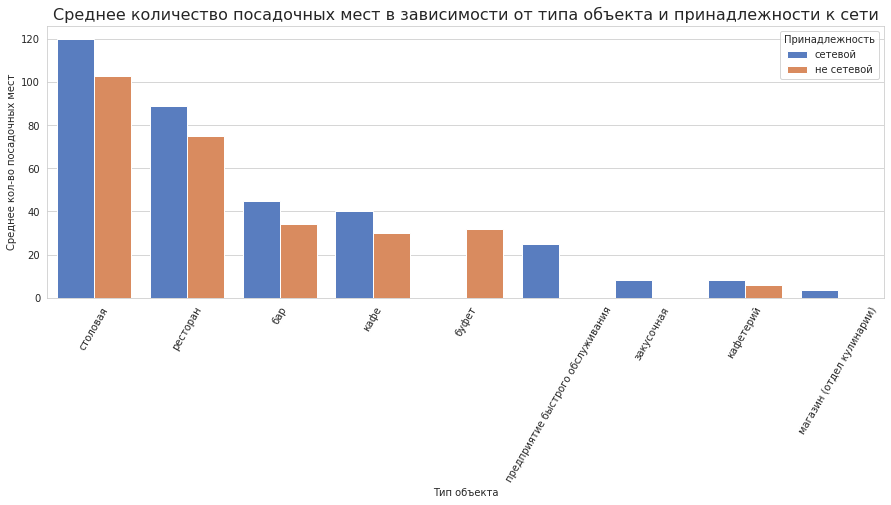

Таблица "Cреднее количество посадочных мест в зависимости от типа объекта и принадлежности к сети"


,Тип объекта,Принадлежность,Среднее кол-во посадочных мест
0,столовая,cетевой,120.0
1,столовая,не сетевой,103.0
2,ресторан,cетевой,89.0
3,ресторан,не сетевой,75.0
4,бар,cетевой,45.0
5,кафе,cетевой,40.0
6,бар,не сетевой,34.0
7,буфет,не сетевой,32.0
8,кафе,не сетевой,30.0
9,предприятие быстрого обслуживания,cетевой,25.0


----------------------------------------------------------------------------------------------------------------


In [12]:
# создадим 2 таблицы отдельно для всех заведений и отдельно по принадлежности к сетям
# построим на их основе 2 барплота

median_seats = rest_data.groupby('object_type')['seats_numbers'].median().sort_values(ascending=False).reset_index()
median_seats.columns = ['Тип объекта', 'Среднее кол-во посадочных мест']

median_seats_with_chain = rest_data.groupby(['object_type','chain'])['seats_numbers'].median().sort_values(ascending=False).reset_index()
median_seats_with_chain.columns = ['Тип объекта', 'Принадлежность', 'Среднее кол-во посадочных мест']

print('Таблица "Cреднее количество посадочных мест в зависимости от типа объекта"')
display(median_seats)
plt.figure(figsize=(15,5))
sns.barplot(x='Тип объекта', y='Среднее кол-во посадочных мест', data=median_seats, palette="muted")
plt.title('Cреднее количество посадочных мест в зависимости от типа объекта', fontsize=16)
plt.tick_params(axis='x', labelrotation=60)
plt.show()
print('----------------------------------------------------------------------------------------------------------------')

plt.figure(figsize=(15,5))
sns.barplot(x='Тип объекта', y='Среднее кол-во посадочных мест', data=median_seats_with_chain, hue='Принадлежность', palette="muted")
plt.title('Cреднее количество посадочных мест в зависимости от типа объекта и принадлежности к сети', fontsize=16)
plt.tick_params(axis='x', labelrotation=60)
plt.show()
print('Таблица "Cреднее количество посадочных мест в зависимости от типа объекта и принадлежности к сети"')
display(median_seats_with_chain)
print('----------------------------------------------------------------------------------------------------------------')

<div style="border:dotted black 3px; padding: 20px">
    
Из данных графиков видно, что в среднем (несмотря на небольшие отличия показателя при делении по принадлежности к сети или нет) "столовые" имеют больше всего посадочных мест, в среднем 103 места по рынку.<br><br>
<hr>
    
Итого, средние показатели по кол-ву посадочных мест по типам объектов распределились следующим образом:<br>

1) Столовая	- 103 места<br>
    
2) Ресторан - 80 мест<br>
    
3)	Бар - 35 мест<br>
    
4)	Буфет - 32 места<br>
    
5)	Кафе - 30 мест<br>
    
6)	Предприятие быстрого обслуживания - 6 мест<br>
    
7)	Кафетерий - 6 мест<br>
    
8)	Магазин (отдел кулинарии) - 0 мест<br>
    
9)	Закусочная - 0 мест<br><br>
    
    
Стоит отметить, что во всех типах сетевых заведений показатель среднего кол-ва посадочных мест больше, чем в аналогичных не сетевых типах.    
    
</div>

###  Изучение улиц с наибольшим количеством объектов 

Для начала выделим в отдельный столбец название улицы (проспекта, переулка и т.п.) из столбца `object_address`. Используем метод `split()`, который вернет второе значение после первой запятой (первым значением выступает указание города).

In [13]:
rest_data['street_name'] = rest_data['object_address'].apply(lambda x: x.split(', ')[1])

**Воспользовавшись хабом открытых данных `http://hubofdata.ru` мы нашли файл `.csv` с отсылкой на АО "Мосгаз" с названиями улиц, районами и округами, к которым они относятся. Мы сохранили этот файл в Google Drive: прочитаем его и посмотрим на общую информацию и содержимое 10 строк.**

In [14]:
url = 'https://drive.google.com/file/d/1I2qKUvWv6jNRNKH243JR1kFNXJK3eg30/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
districts_data = pd.read_csv(path)

districts_data.name = '"Открытые данные об улицах и районах г.Москвы (источник: АО "Мосгаз")"'
print(districts_data.info())
print('--------------------------------------------------------------------------------------------------------------------')
print(districts_data.name)
display(districts_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
streetname    4398 non-null object
areaid        4398 non-null int64
okrug         4398 non-null object
area          4398 non-null object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB
None
--------------------------------------------------------------------------------------------------------------------
"Открытые данные об улицах и районах г.Москвы (источник: АО "Мосгаз")"


,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
5,Малый Гнездниковский переулок,17,ЦАО,Пресненский район
6,Большая Грузинская улица,17,ЦАО,Пресненский район
7,Малая Грузинская улица,17,ЦАО,Пресненский район
8,Грузинская площадь,17,ЦАО,Пресненский район
9,улица Грузинский Вал,17,ЦАО,Пресненский район


Пропусков нет, типы данных соответствуют. Проверим на наличие дубликатов и скорректируем названия столбцов.

In [15]:
duplicates = districts_data.duplicated().sum()
if duplicates > 0:
    print('Количество дубликатов =', duplicates)
else:
    print('Дубликатов не найдено')

districts_data = districts_data.rename({'streetname': 'street_name', 'areaid': 'district_id', 'okrug': 'district_zone', 'area': 'district'}, axis = 'columns')
districts_data.head(10)

Количество дубликатов = 8


,street_name,district_id,district_zone,district
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
5,Малый Гнездниковский переулок,17,ЦАО,Пресненский район
6,Большая Грузинская улица,17,ЦАО,Пресненский район
7,Малая Грузинская улица,17,ЦАО,Пресненский район
8,Грузинская площадь,17,ЦАО,Пресненский район
9,улица Грузинский Вал,17,ЦАО,Пресненский район


Удалим найденные дубликаты.

In [16]:
districts_data = districts_data.drop_duplicates().reset_index(drop=True)

**Мы выбрали данный датафрейм из других аналогов в связи с подходящим нам условием - в нем нет сокращений (ул./пер./ш. и прочих), это нам подходит по содержимому нашего датафрейма.**

Объединим `districts_data` с `rest_data` по столбцу `street_name`.

In [17]:
print()
print('Длина датафрейма до объединения:', len(rest_data))

rest_data_updated = rest_data.merge(districts_data, on='street_name')

print('Длина датафрейма после объединения:', len(rest_data_updated))
print('-----------------------------------------------------------------------------------------------------------------------')
print()
display(rest_data_updated.info())
display(rest_data_updated.head(10))


Длина датафрейма до объединения: 15281
Длина датафрейма после объединения: 29321
-----------------------------------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29321 entries, 0 to 29320
Data columns (total 10 columns):
id                29321 non-null int64
object_name       29321 non-null object
chain             29321 non-null object
object_type       29321 non-null object
object_address    29321 non-null object
seats_numbers     29321 non-null int64
street_name       29321 non-null object
district_id       29321 non-null int64
district_zone     29321 non-null object
district          29321 non-null object
dtypes: int64(3), object(7)
memory usage: 2.5+ MB


None

,id,object_name,chain,object_type,object_address,seats_numbers,street_name,district_id,district_zone,district
0,151635,сметана,не сетевой,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,86,СВАО,Ярославский Район
1,193477,grill-house,не сетевой,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,улица Егора Абакумова,86,СВАО,Ярославский Район
2,196756,пекарня,не сетевой,кафетерий,"город Москва, улица Егора Абакумова, дом 14А",12,улица Егора Абакумова,86,СВАО,Ярославский Район
3,77874,родник,не сетевой,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,18,ЦАО,Таганский район
4,77874,родник,не сетевой,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,117,ЮВАО,Нижегородский район
5,77874,родник,не сетевой,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,133,ЮЗАО,Район Южное Бутово
6,83942,кафе даиси,не сетевой,кафе,"город Москва, улица Талалихина, дом 31А/2",78,улица Талалихина,18,ЦАО,Таганский район
7,83942,кафе даиси,не сетевой,кафе,"город Москва, улица Талалихина, дом 31А/2",78,улица Талалихина,117,ЮВАО,Нижегородский район
8,83942,кафе даиси,не сетевой,кафе,"город Москва, улица Талалихина, дом 31А/2",78,улица Талалихина,133,ЮЗАО,Район Южное Бутово
9,24739,бар варвар,не сетевой,кафе,"город Москва, улица Талалихина, дом 35",45,улица Талалихина,18,ЦАО,Таганский район


Произошло увеличение кол-ва наблюдений в датафрейме за счет того, что мы не учитываем номера домов: одна и та же улица с разными номерами домов может относится к разным районам Москвы. Будем иметь этот момент ввиду и при подсчете учитывать только уникальные 'id' объектов при группировках.

Сгруппируем датафрейм по улицам и районам и посчитаем кол-во объектов. Отсортируем по убыванию кол-ва объектов и выделим ТОП-10 улиц с наибольшим кол-вом объектов.

In [18]:
top10_streets = rest_data_updated.groupby('street_name')['id'].nunique().sort_values(ascending=False).reset_index().head(10)
top10_streets.columns = ['Название улицы', 'Количество заведений']

top10_districts = rest_data_updated.groupby('district')['id'].nunique().sort_values(ascending=False).reset_index().head(10)
top10_districts.columns = ['Название района', 'Количество заведений']

# просмотрим результат
display(top10_streets)
display(top10_districts)

,Название улицы,Количество заведений
0,город Зеленоград,232
1,проспект Мира,203
2,Профсоюзная улица,181
3,Ленинградский проспект,170
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
7,проспект Вернадского,128
8,Кутузовский проспект,114
9,Каширское шоссе,111


,Название района,Количество заведений
0,Тверской район,1119
1,Пресненский район,786
2,Басманный район,701
3,Даниловский район,664
4,Мещанский район,660
5,Донской район,580
6,Таганский район,528
7,Обручевский район,491
8,Район Замоскворечье,479
9,Район Гагаринский,470


Город Зеленоград попал в названия улиц и занял 1 место. Пробежимся визуально по датафрейму с выделенным названием улицы равным `"город Зеленоград"`.

In [19]:
rest_data_updated.query('street_name == "город Зеленоград"').head(10)

,id,object_name,chain,object_type,object_address,seats_numbers,street_name,district_id,district_zone,district
20919,22331,столовая миэт,не сетевой,столовая,"город Москва, город Зеленоград, улица Юности, дом 11",56,город Зеленоград,51,Зеленоград,Район Крюково
20920,22331,столовая миэт,не сетевой,столовая,"город Москва, город Зеленоград, улица Юности, дом 11",56,город Зеленоград,52,Зеленоград,Район Матушкино-Савелки
20921,22331,столовая миэт,не сетевой,столовая,"город Москва, город Зеленоград, улица Юности, дом 11",56,город Зеленоград,53,Зеленоград,Панфиловский район
20922,20199,это,не сетевой,кафе,"город Москва, город Зеленоград, корпус 401",35,город Зеленоград,51,Зеленоград,Район Крюково
20923,20199,это,не сетевой,кафе,"город Москва, город Зеленоград, корпус 401",35,город Зеленоград,52,Зеленоград,Район Матушкино-Савелки
20924,20199,это,не сетевой,кафе,"город Москва, город Зеленоград, корпус 401",35,город Зеленоград,53,Зеленоград,Панфиловский район
20925,68113,френдс,не сетевой,кафе,"город Москва, город Зеленоград, корпус 435",34,город Зеленоград,51,Зеленоград,Район Крюково
20926,68113,френдс,не сетевой,кафе,"город Москва, город Зеленоград, корпус 435",34,город Зеленоград,52,Зеленоград,Район Матушкино-Савелки
20927,68113,френдс,не сетевой,кафе,"город Москва, город Зеленоград, корпус 435",34,город Зеленоград,53,Зеленоград,Панфиловский район
20928,20105,кафе «граф монте-кристо»,не сетевой,кафе,"город Москва, город Зеленоград, корпус 436",40,город Зеленоград,51,Зеленоград,Район Крюково


Визуально судя по результату по городу Зеленограду будет проблематично выделить улицу, т.к. географически указываются часто просто корпуса домов. В данном исследованни **исключим город Зеленоград** из наших выборок `top10_by_streets` и `top10_by_districts`. По г. Зеленограду рекомендуем провести доп.исследование с задействованием дополнительных инструментов и гео-данных.

-----------------------------------------------------------------------------------------------------------------------


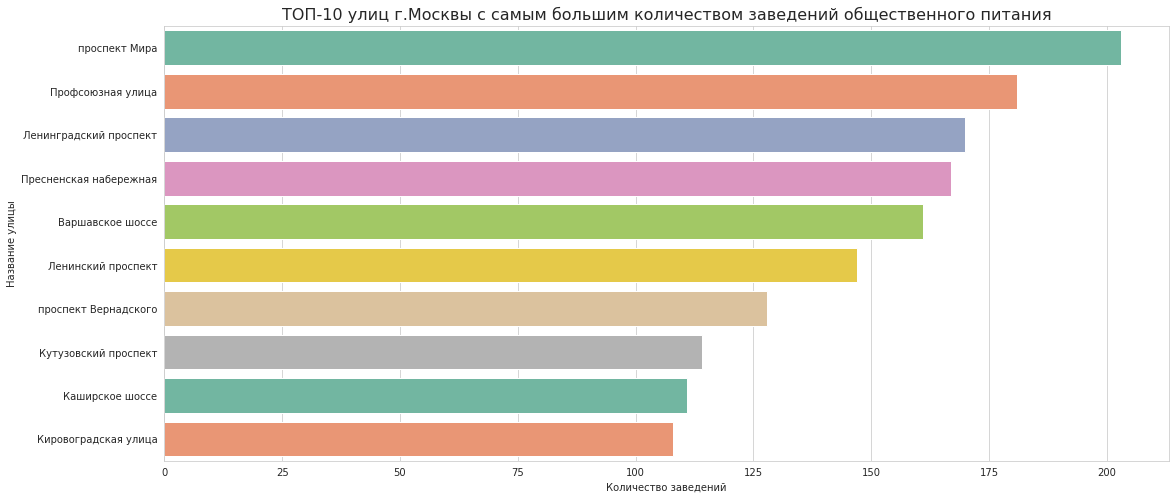

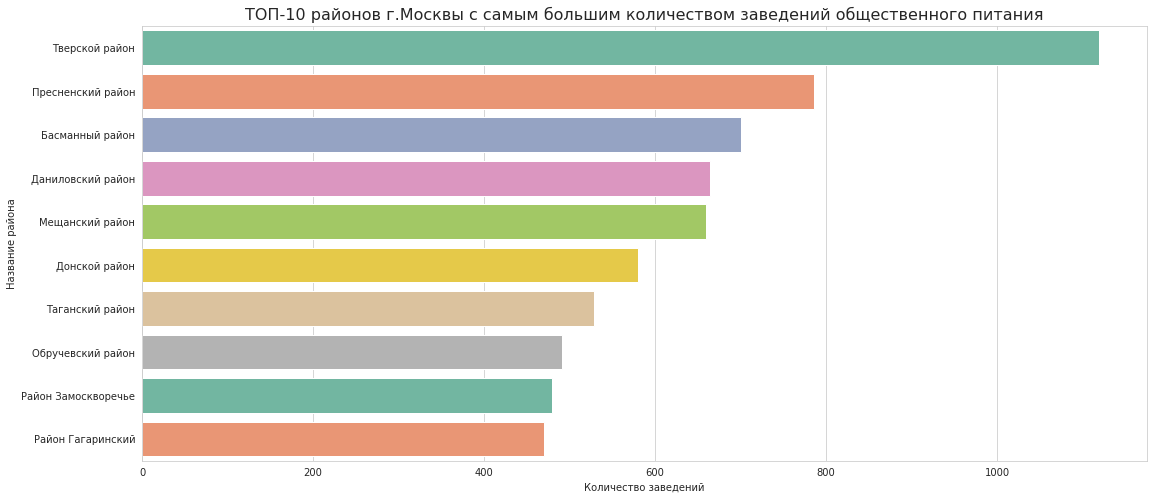

-----------------------------------------------------------------------------------------------------------------------


In [20]:
# определим ТОП-10 улиц 

top10_streets = rest_data_updated.query('street_name != "город Зеленоград"') \
    .groupby(['street_name'])['id'].nunique().sort_values(ascending=False).reset_index().head(10)
top10_streets.columns = ['Название улицы', 'Количество заведений']

# и дополнительно посмотрим на ТОП-10 районов

top10_districts = rest_data_updated.query('street_name != "город Зеленоград"') \
    .groupby('district')['id'].nunique().sort_values(ascending=False).reset_index().head(10)
top10_districts.columns = ['Название района', 'Количество заведений']

# строим гистограммы 

plt.figure(figsize=(18,8))
sns.barplot(y='Название улицы', x='Количество заведений', data=top10_streets, palette="Set2")
plt.title('ТОП-10 улиц г.Москвы с самым большим количеством заведений общественного питания', fontsize=16)
print('-----------------------------------------------------------------------------------------------------------------------')
plt.figure(figsize=(18,8))
sns.barplot(y='Название района', x='Количество заведений', data=top10_districts, palette="Set2")
plt.title('ТОП-10 районов г.Москвы с самым большим количеством заведений общественного питания', fontsize=16)
plt.show()
print('-----------------------------------------------------------------------------------------------------------------------')

Присоединим к найденным 10 улицам названия районов и округов, к которым они принадлежат.

In [21]:
# выделим только нужные 3 столбца из дф `districts_data`
streets_with_districts = districts_data[['street_name', 'district', 'district_zone']].copy()
streets_with_districts.columns = ['Название улицы', 'Район', 'Округ']

# присоединяем 
top10_streets_with_districts = top10_streets.merge(streets_with_districts, on='Название улицы', how='left') \
.sort_values(by='Количество заведений', ascending=False)

Поскольку, как мы выяснили ранее, одно название улицы может относиться к разным районам и округам, построим барплот c 3-им измерением (возьмем 'Округ' для рассмотрения). А также выведем в виде таблицы результат.

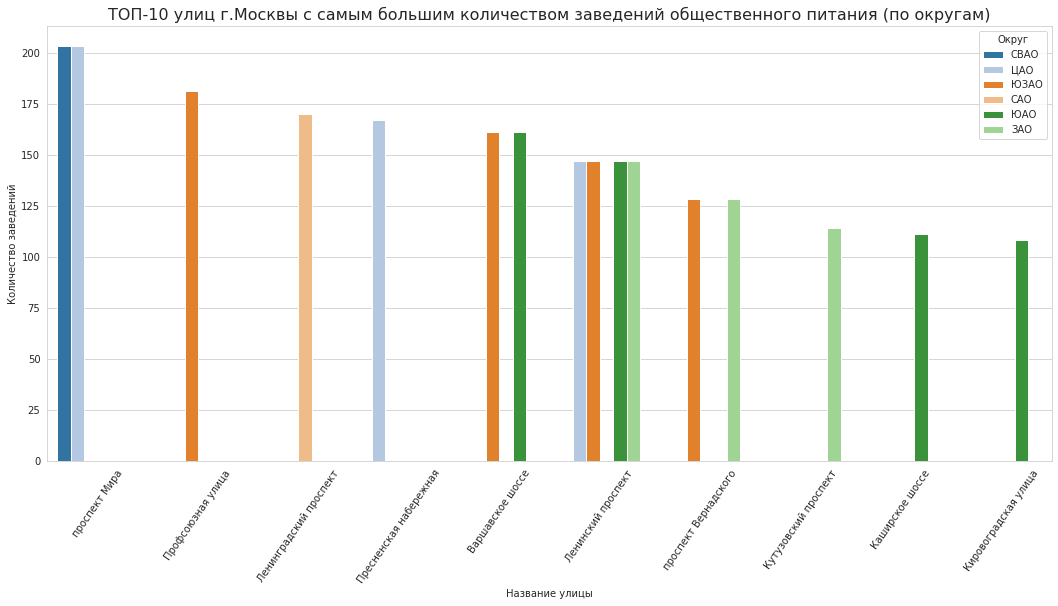

---------------------------------------------------------------------------------------------------------------------
ТОП-10 улиц г.Москвы с самым большим количеством заведений общественного питания (по округам)


,Название улицы,Количество заведений,Район,Округ
0,проспект Мира,203,Алексеевский район,СВАО
2,проспект Мира,203,Район Марьина роща,СВАО
3,проспект Мира,203,Останкинский район,СВАО
4,проспект Мира,203,Район Ростокино,СВАО
5,проспект Мира,203,Район Свиблово,СВАО
6,проспект Мира,203,Мещанский район,ЦАО
1,проспект Мира,203,Ярославский Район,СВАО
11,Профсоюзная улица,181,Обручевский район,ЮЗАО
12,Профсоюзная улица,181,Район Теплый Стан,ЮЗАО
10,Профсоюзная улица,181,Район Коньково,ЮЗАО


---------------------------------------------------------------------------------------------------------------------
ТОП-10 районов г.Москвы с самым большим количеством заведений общественного питания


,Название района,Количество заведений
0,Тверской район,1119
1,Пресненский район,786
2,Басманный район,701
3,Даниловский район,664
4,Мещанский район,660
5,Донской район,580
6,Таганский район,528
7,Обручевский район,491
8,Район Замоскворечье,479
9,Район Гагаринский,470


In [22]:
plt.figure(figsize=(18,8))
sns.barplot(data=top10_streets_with_districts, x='Название улицы', y='Количество заведений', hue='Округ', palette="tab20")
plt.title('ТОП-10 улиц г.Москвы с самым большим количеством заведений общественного питания (по округам)', fontsize=16)
plt.tick_params(axis='x', labelrotation=55)
plt.show()

print('---------------------------------------------------------------------------------------------------------------------')
print('ТОП-10 улиц г.Москвы с самым большим количеством заведений общественного питания (по округам)')
display(top10_streets_with_districts)
print('---------------------------------------------------------------------------------------------------------------------')
print('ТОП-10 районов г.Москвы с самым большим количеством заведений общественного питания')
display(top10_districts)

<div style="border:dotted black 3px; padding: 20px">
    
<b>Мы определили ТОП-10 улиц (и районы, к которым они относятся) и ТОП-10 районов с самым большим количеством заведений общественного питания.</b><br><br>
    
<b>ТОП-10 улиц:</b><br>
1. Проспект Мира (районы: Алексеевский, Марьина роща, Останкинский, Свиблово, Мещанский, Ярославский)<br>
2. Профсоюзная улица (районы: Обручевский, Теплый Стан, Коньково, Ясенево, Черемушки, Академический<br>
3. Ленинградский проспект (районы: Аэропорт, Беговой, Хорошевский, Сокол)<br>
4. Пресненская набережная (район: Пресненский)<br>
5. Варшавское шоссе (районы: Нагатино-Садовники, Южное Бутово, Нагорный, Северное Бутово, Донской, Чертаново Северное, Чертаново Центральное, Чертаново Южное)<br>
6. Ленинский проспект (районы: Проспект Вернадского, Тропарево-Никулино, Донской, Гагаринский, Ломоносовский, Обручевский, Теплый Стан, Якиманка)<br>
7. Проспект Вернадского (районы: Гагаринский, Ломоносовский, Раменки, Тропарево-Никулино, Проспект Вернадского)<br>
8. Кутузовский проспект (районы: Дорогомилово, Фили-Давыдково)<br>
9. Каширское шоссе (районы: Москворечье-Сабурово, Нагатино-Садовники, Орехово-Борисово Южное, Орехово-Борисово Северное)<br>
10. Кировоградская улица (районы: Чертаново Центральное, Чертаново Северное, Чертаново Южное)<br><br>
    
<b>ТОП-10 районов:</b> <br> 
1. Тверской район - 1119 заведений<br>
2. Пресненский район - 786 заведений<br>
3. Басманный район - 701 заведение<br>
4. Даниловский район - 664 заведения<br>
5. Мещанский район - 660 заведений<br>
6. Донской район - 580 заведений<br>
7. Таганский район - 528 заведений<br>
8. Обручевский район - 491 заведение<br>
9. Район Замоскворечье - 479 заведений<br>
10. Район Гагаринский - 470  заведений<br>
    
</div>

###  Изучение улиц с минимальным количеством объектов

Определим есть ли такие улицы и сколько таких улиц (если они есть), на которых находится всего 1 объект общественного питания.

In [23]:
# группируем по улице, посчитаем кол-во объектов и с помощью `query` выделим срез только с 1 объектом общ.питания
# (в поиске не будем учитывать город Зеленоград)
# в выводе оставим для удобства название объекта, его тип, район и округ

streets_with_1_object = rest_data_updated \
.query('street_name != "город Зеленоград"') \
.groupby('street_name').agg({'id': 'count', 'object_type': 'max', 'object_name': 'max', 'district': 'max', 'district_zone': 'max'}) \
.query('id == 1').reset_index()

print('Найдено {} улиц с 1 заведением общественного питания.'.format(len(streets_with_1_object)))
display(streets_with_1_object.head(10))

Найдено 478 улиц с 1 заведением общественного питания.


,street_name,id,object_type,object_name,district,district_zone
0,1-й Балтийский переулок,1,ресторан,хуанхэ,Район Аэропорт,САО
1,1-й Ботанический проезд,1,столовая,буфет при гуп «объединенный комбинат школьно питания»,Район Свиблово,СВАО
2,1-й Вешняковский проезд,1,столовая,столовая гну виэсх,Рязанский район,ЮВАО
3,1-й Голутвинский переулок,1,кафе,шелби,Район Якиманка,ЦАО
4,1-й Зачатьевский переулок,1,кафе,кафе-пиццерия,Район Хамовники,ЦАО
5,1-й Кирпичный переулок,1,магазин (отдел кулинарии),пекарня,Район Соколиная Гора,ВАО
6,1-й Кожевнический переулок,1,кафе,кафе,Даниловский район,ЮАО
7,1-й Кожуховский проезд,1,столовая,школа №1272,Даниловский район,ЮАО
8,1-й Котельнический переулок,1,столовая,школа 2104,Таганский район,ЦАО
9,1-й Краснокурсантский проезд,1,ресторан,гостиница лефортово,Район Лефортово,ЮВАО


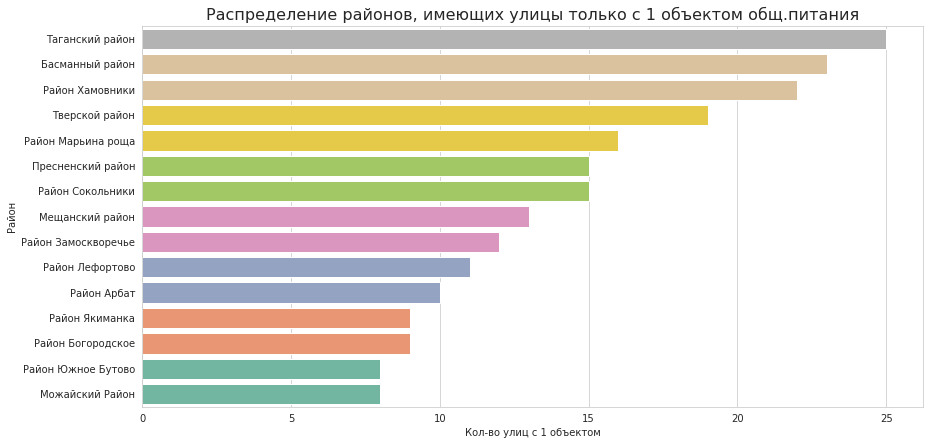

----------------------------------------------------------------------------------------------------------------------
Районы, имеющие улицы только с 1 объектом общ.питания


,district,district_zone,id
0,Таганский район,ЦАО,25
1,Басманный район,ЦАО,23
2,Район Хамовники,ЦАО,22
3,Тверской район,ЦАО,19
4,Район Марьина роща,СВАО,16
5,Пресненский район,ЦАО,15
6,Район Сокольники,ВАО,15
7,Мещанский район,ЦАО,13
8,Район Замоскворечье,ЦАО,12
9,Район Лефортово,ЮВАО,11


In [24]:
# посмотрим в каких районах находятся эти улицы

streets_with_1_object_by_district = streets_with_1_object \
.groupby(['district', 'district_zone'])['id'].count() \
.sort_values(ascending=False).reset_index().head(15)  # ограничим до 15 районов

plt.figure(figsize=(14,7))
sns.barplot(y='district', x='id', data=streets_with_1_object_by_district, palette='Set2_r')
plt.title('Распределение районов, имеющих улицы только с 1 объектом общ.питания', fontsize=16)
plt.xlabel('Кол-во улиц с 1 объектом')
plt.ylabel('Район')
plt.show()

print('----------------------------------------------------------------------------------------------------------------------')
print('Районы, имеющие улицы только с 1 объектом общ.питания')
display(streets_with_1_object_by_district)

<div style="border:dotted black 3px; padding: 20px">

Значительное количество улиц (478 улиц) имеют всего лишь 1 объект общественного питания.<br><br>

При этом больше всего из этих улиц находятся в ЦАО, исходя из этого можно сказать, что влияет факт наличия в центре маленьких улочек и переулков, на которых нахождение по 1 заведению - это физическая норма.<br><br>
    
СВАО и ВАО - округа, в которых также достаточно улиц только с 1 заведением.<br><br>
    
Исходя из имеющихся у нас исходных данных и отсутствия дополнительных (о проходимости на этих улицах, о среднем чеке в подобных заведениях) мы не имеем возможности детальнее сделать вывод о перспективности данных улиц для открытия кафе.
    
</div>

### Изучение распределения количества посадочных мест: ТОП-10 улиц с большим кол-во объектов

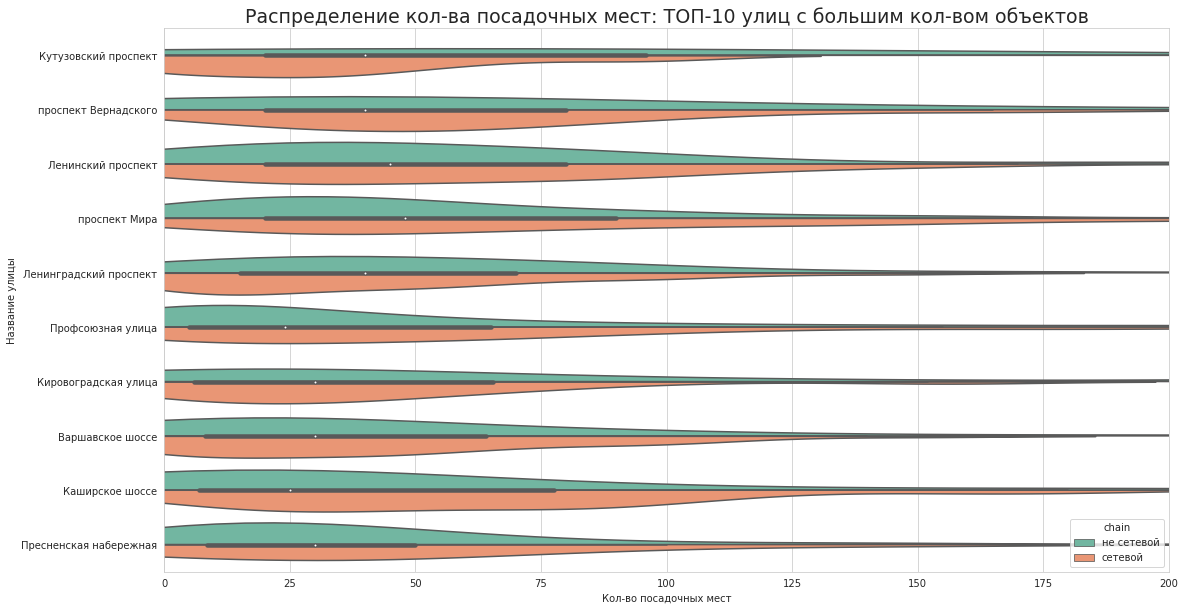

In [25]:
# т.к. нам нужно получить доступ к столбцу `seats_numbers`, создадим датафрейм `seats_data`, 
# проверив вхождение найденных ТОП-10 улиц из дф `top10_streets` в последний дф `rest_data_updated`

seats_data_top10_streets = rest_data_updated[rest_data_updated['street_name'].isin(top10_streets['Название улицы'].tolist())]

# чтобы не было дублей кол-ва мест из-за повторов улиц (из-за принадлежности их к разным районам)
# сгруппируем по 'id' объекта и оставим нужные нам столбцы 
seats_data_top10_streets = seats_data_top10_streets.groupby('id') \
.agg({'street_name':'max', 'seats_numbers': 'max', 'chain':'max'}).reset_index()

# строим `violinplot`

plt.figure(figsize=(18, 10))
sns.violinplot(y='street_name', x='seats_numbers', data=seats_data_top10_streets, \
               hue='chain', scale_hue='True', split=True, palette='Set2')
plt.xlim(0, 200)
plt.title('Распределение кол-ва посадочных мест: ТОП-10 улиц с большим кол-вом объектов', fontsize=19)
plt.xlabel('Кол-во посадочных мест')
plt.ylabel('Название улицы')
plt.show()

<div style="border:dotted black 3px; padding: 20px">
    
Из данного графика видно, что форма и плотность распределения значений кол-ва мест по всем 10 улицам имеет сходства. Удлиненная форма говорит о небольшой плотности значений и длинный хвост о наличии редких значений.<br><br>
    
Но медианные показатели по всем ТОП-10 улицам лежат в диапазоне от 25 мест до 49 мест.<br><br> 

Проспект Мира имеет наибольший медианный показатель кол-ва мест среди всех 10 улиц - 49 мест в среднем.<br><br>

И удивительно, что, несмотря на вторую позицию по кол-ву объектов на Профсоюзной улице - медианный же показатель кол-ва мест на этой улице меньше всех из ТОП-10 улиц - 24 места.<br><br>
    
По межквартильному размаху выделяются Кутузовский проспект и Проспект Мира: показатели Q1 и Q3 квартилей самые высокие среди остальных улиц.<br><br>
    
Кутузовский проспект отличается также преобладанием сетевых заведений над не сетевыми.
    
</div>

## Общий вывод

<div style="border: ridge black 3px; padding: 25px">


<b>В результате проведённого исследования по выявлению особенностей заведений общественного питания в г.Москве определено следующее:</b><br><br>
    
1. Больше всего в Москве заведений типа "кафе" ("столовые", "рестораны" и "предприятия быстрого обслуживания" на 2, 3 и 4 месте, соответственно).<br>
    
    
2. 80% всех объектов являются не сетевыми.<br>
    
    
3. Для "предприятий быстрого обслуживания" характерно сетевое распространение ("кафе" и "рестораны" в меньшем соотношении по сравнению с не сетевыми заведениями данных типов).<br><br>
    
    
<b>Посадочные места:</b><br>
    
- В Москве преобладающая часть сетевых заведений работает в формате "на вынос/с собой" (265 заведений с 0 посадочных мест).<br>
      
- Количество посадочных мест в большинстве сетевых заведений представлено в диапазоне от 10 до 60 мест.<br>

- В заведениях, относящихся к списку из "ТОП-10 улиц с самым большим количеством заведений", диапазон посадочных мест лежит от 25 до 49 мест.<br>
    
- Заведений с посадочными местами от 100 и более 500 - меньше всего представлено среди зведений общ.питания.<br>
    
- В среднем больше всего посадочных мест представлено в "столовых":  103 места в среднем. На 2 и 3 месте, соответственно, ресторан (80 мест в среднем) и бар (35 мест в среднем).<br>
    
- Показатель среднего кол-ва посадочных мест больше во всех сетевых заведениях, чем в аналогичных не сетевых.<br><br>
    
<b>Улицы:</b><br>
    
- Проспект Мира (ЦАО и СВАО) является лидером по кол-ву заведений (203 заведения), а также имеет наибольший медианный показатель кол-ва мест среди всех ТОП-10 улиц - 49 мест в среднем. На 2 месте Профсоюзная улица (ЮЗАО): 181 заведение (ее медианный показатель кол-ва мест среди всех ТОП-10 улиц, наоборот, меньше всех - 24 места).<br>
    
- 478 улиц имеют всего лишь 1 объект общественного питания. Больше всего таких улиц находится в ЦАО (обусловлено физическими размерами улочек и переулков в центре Москвы). Далее идут СВАО и ВАО по кол-ву таких улиц.<br><br>
    
<b>Районы:</b><br>
    
- Тверской район (ЦАО) является лидером по кол-ву расположенных в нём заведений: 1119 заведений.<br><br>
    
<hr>  
 
<i><b>Рекомендации:</b></i><br>
    
Учитывая отсутствие дополнительных данных (о проходимости на улицах, о сезонности и посещаемости как местными жителями, так и туристами, о среднем чеке в заведениях на популярных улицах, либо, наоборот, улицах с 1 заведением) есть вероятность ошибиться с точным набором рекомендуемых характеристик будущего роботизированного кафе. Для более точных результатов анализа, учитывая риски и дороговизну будущего проекта кафе, следует провести доп.исследование с дополнительными вводными данными, и с использованием гео-функционала для визуализации объектов и улиц с учетом нумерации домов, расстояния до метро, также добавив в анализ город Зеленоград как отдельный административный округ Москвы со спецификой в изучении (корпуса домов вместо названия улиц).<br><br>
    
Но на основании анализа текущих доступных нам данных и обнаруженных особенностей объектов общественного питания г.Москвы, мы можем рекомендовать обратить внимание на:<br>

1. Перспективный тип заведения - "кафе".<br>
    
2. Среднее кол-во посадочных мест для типа "кафе" - 30 мест.<br>
    
3. Перспективные улица и район: Проспект Мира (ЦАО, СВАО) и Тверской район (ЦАО).* (* - с точки зрения конкуренции целесообразно расположить такое дорогостоящее заведение с роботами-официантами именно в центральной части города (часть Проспекта Мира относится также и к ЦАО), т.к. проходимость довольно большая в центре города, люди разных целевых аудиторий бывают в центре в разное время суток (и, если не брать в счет текущее время и закрытые границы, то частью посетителей могут стать иностранные туристы, которые всегда едут смотреть центр города и интересные места). Такое заведение со спецификой обслуживания роботами способно выделиться именно на территории скопления конкурирующих заведений с традиционным обслуживанием официантами.)<br><br>
    
Сильное влияние принадлежности к сетям не было выявлено, большая часть заведений (80%) являются не сетевыми. В сетевых заведениях отмечено лишь большее кол-во посадочных мест в среднем по сравнению с не сетевыми аналогичных типов.<br>
<hr>
 
</div>

<b>[Ссылка на презентацию исследования](https://drive.google.com/file/d/15N3pF0zsgBIr0D_eT9RB_2KRrO-o-bv1/view?usp=sharing)</b>